In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle 
import seaborn as sns

In [9]:
with open("/Users/anna/Downloads/Scriptie_code/Code/notebooks/phy_results_rawlabels2.pkl", "rb") as f:
    results_phy = pickle.load(f)

In [10]:
# # # unpack dict & look at structure
# print("Keys:", results_phy.keys())
# print("Keys:", results_phy["no_personality"].keys())
# print("Keys:", results_phy["no_personality"]["regression"].keys())
# print("Keys:", results_phy["no_personality"]["regression"][('RF', 'arousal')].keys())
# print("Keys:", results_phy["no_personality"]["regression"][('RF', 'arousal')]["metrics"].keys())

In [11]:
features1 =  results_phy["2_pca_clusters"]["labeled_full"]
display(features1)

,ParticipantID,VideoID,MeanSCRAmplitude,SDSCRAmplitude,NSSCRFrequency,MeanRiseTime,MeanRecoveryTime_50,MeanSCL,SCLSlope,MeanIBI,MeanHR,SDNN,RMSSD,pNN50,Cluster_PC1,Cluster_PC2,arousal,valence
0,1,1,0.062420,0.044335,10.954357,1.863636,1.625000,1.372424,-0.000361,0.810146,74.060766,101.584908,147.520927,57.534247,-0.837315,0.072387,6,4
1,1,2,0.030692,0.015230,18.960499,1.368421,1.023810,1.264481,0.000068,0.780637,76.860283,157.181458,206.380479,75.816993,-0.837315,0.072387,4,8
2,1,3,0.036732,0.018636,16.465696,1.454545,1.166667,1.015059,-0.000431,0.877281,68.393136,121.763302,156.926385,67.883212,-0.837315,0.072387,6,3
3,1,4,0.056859,0.046772,11.566265,1.437500,0.975000,0.926813,-0.000513,0.865668,69.310604,78.789416,117.542742,68.055556,-0.837315,0.072387,4,5
4,1,5,0.036569,0.025894,12.649098,1.552632,1.035714,0.694676,0.001345,0.825461,72.686671,105.282067,151.209946,59.447005,-0.837315,0.072387,6,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,30,20,0.002984,0.001857,12.140078,2.076923,1.194444,-0.512426,-0.000225,0.941636,63.718887,32.910374,45.494280,23.529412,1.230035,-1.304334,3,3
672,30,21,0.003288,0.002608,12.972973,1.711538,0.881579,-0.550134,-0.000127,0.894706,67.061123,38.699161,44.648731,19.402985,1.230035,-1.304334,2,3
673,30,23,0.002530,0.002358,10.977131,1.806818,1.166667,-0.571020,-0.000136,0.949901,63.164491,39.642812,41.363480,14.285714,1.230035,-1.304334,6,2
674,30,24,0.002670,0.001923,14.968815,1.691667,1.054348,-0.616000,-0.000102,0.952505,62.991798,34.708653,52.029138,28.571429,1.230035,-1.304334,2,4


In [12]:
std_col_a = features1['arousal'].std()
std_col_b = features1['valence'].std()

print(f"Standard Deviation of arousal: {std_col_a}")
print(f"Standard Deviation of valence: {std_col_b}")

Standard Deviation of arousal: 2.237706082564005
Standard Deviation of valence: 1.9232495649002193


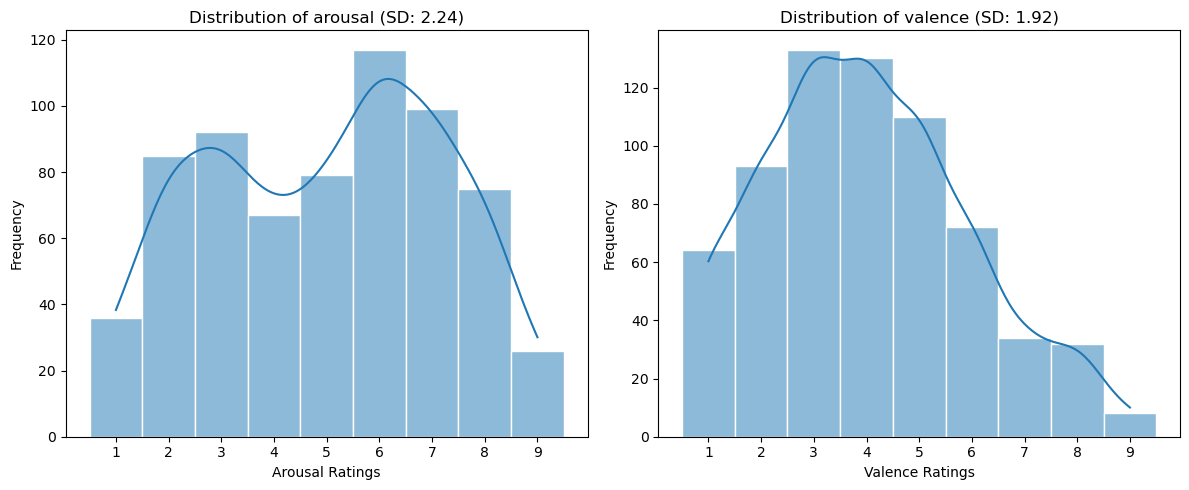

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set bin edges to center bins on integers: [0.5, 1.5), [1.5, 2.5), ..., [8.5, 9.5)
bins = np.arange(0.5, 10, 1)

plt.figure(figsize=(12, 5))

# Plot for arousal
plt.subplot(1, 2, 1)
sns.histplot(features1['arousal'], bins=bins, kde=True, edgecolor='white')
plt.title(f'Distribution of arousal (SD: {std_col_a:.2f})')
plt.xlabel('Arousal Ratings')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(np.arange(1, 10))  # ensure integer ticks

# Plot for valence
plt.subplot(1, 2, 2)
sns.histplot(features1['valence'], bins=bins, kde=True, edgecolor='white')
plt.title(f'Distribution of valence (SD: {std_col_b:.2f})')
plt.xlabel('Valence Ratings')
plt.ylabel('Frequency')
plt.grid(False)
plt.xticks(np.arange(1, 10))

plt.tight_layout()
plt.show()


In [14]:
# build a list of rows with (setting, algorithm, task, R², MAE, RMSE)
rows = []
for setting, met in results_phy.items():
    reg = met["regression"]  # direct access, no ["results"]
    for (algo, task), info in reg.items():
        m = info["metrics"]  # this is your metrics dict
        rows.append({
            "setting"   : setting,
            "algorithm" : algo,
            "task"      : task,
            "R²"        : m["r2"],
            "MAE"       : m["mae"],
            "RMSE"      : m["rmse"]
        })

metrics_df = (
    pd.DataFrame(rows)
      .set_index(["setting", "algorithm", "task"])
      .sort_index()
)

print(metrics_df)


                                        R²       MAE      RMSE
setting        algorithm task                                 
2_pca_clusters RF        arousal  0.069265  1.841828  2.142857
                         valence -0.037382  1.610092  1.965846
               SVR       arousal -0.073022  1.946393  2.300830
                         valence -0.014844  1.576672  1.944374
no_personality RF        arousal  0.061124  1.873514  2.152209
                         valence -0.048989  1.604744  1.976813
               SVR       arousal  0.007494  1.879735  2.212823
                         valence -0.008527  1.576645  1.938313
traits         RF        arousal  0.043354  1.855593  2.172480
                         valence -0.020800  1.602363  1.950072
               SVR       arousal -0.021799  1.902516  2.245241
                         valence  0.002545  1.558790  1.927644


In [15]:
# rank all models by R², descending
best_by_r2 = metrics_df.sort_values(by="RMSE", ascending=True)
print(best_by_r2.head(10))

                                        R²       MAE      RMSE
setting        algorithm task                                 
traits         SVR       valence  0.002545  1.558790  1.927644
no_personality SVR       valence -0.008527  1.576645  1.938313
2_pca_clusters SVR       valence -0.014844  1.576672  1.944374
traits         RF        valence -0.020800  1.602363  1.950072
2_pca_clusters RF        valence -0.037382  1.610092  1.965846
no_personality RF        valence -0.048989  1.604744  1.976813
2_pca_clusters RF        arousal  0.069265  1.841828  2.142857
no_personality RF        arousal  0.061124  1.873514  2.152209
traits         RF        arousal  0.043354  1.855593  2.172480
no_personality SVR       arousal  0.007494  1.879735  2.212823


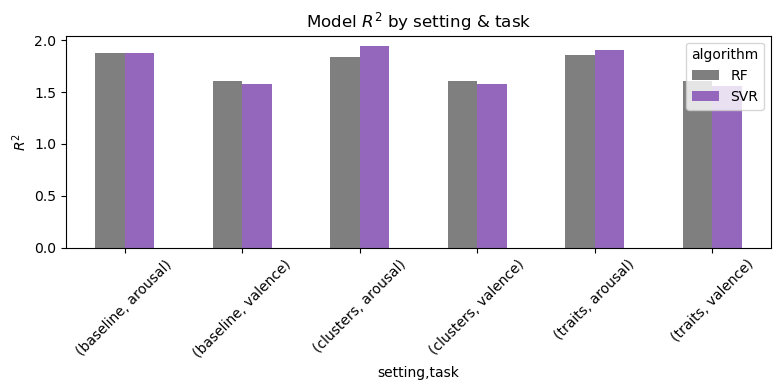

In [16]:
# # en plot:
# # pivot the table so each setting, task is a group of bars per algorithm
# r2_pivot = metrics_df["R²"].unstack(level="algorithm")
# mae_pivot = metrics_df["MAE"].unstack(level="algorithm")
# rmse_pivot = metrics_df["RMSE"].unstack(level="algorithm")

# # plot rsquared
# plt.figure()
# r2_pivot.plot(kind="bar", rot=45, figsize=(8,4))
# plt.ylabel("$R^2$")
# plt.title("Model $R^2$ by setting & task")
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# --- 1. Relabel the “setting” level ---------------------------
label_map = {
    "no_personality": "baseline",
    "traits":          "traits",
    "2_pca_clusters":  "clusters",
}

# if metrics_df has a MultiIndex (setting, task, algorithm)
metrics_df = metrics_df.rename(index=label_map, level="setting")

# --- 2. Re-pivot ------------------------------------------------
r2_pivot  = metrics_df["MAE"].unstack(level="algorithm")

# --- 3. Define bar colours for the two algorithms --------------
alg_colors = [
    plt.get_cmap("tab20")(14),   # index 0  → first algorithm column
    plt.get_cmap("tab20")(8),    # index 1  → second algorithm column
]

# --- 4. Plot ----------------------------------------------------
ax = r2_pivot.plot(
    kind="bar",
    rot=45,
    figsize=(8, 4),
    color=alg_colors,            # apply custom colours
)

ax.set_ylabel("$R^2$")
ax.set_title("Model $R^2$ by setting & task")
plt.tight_layout()
plt.show()


## check for significance

In [17]:
from scipy import stats
from statsmodels.stats.anova import AnovaRM

df = metrics_df.reset_index().rename(columns={"R²": "R2"})

# dependent var = R2
# subject (blocking factor)= task  (because each task is measured under every algo/setting)
# within-factors= algorithm and setting
aov = AnovaRM(df, depvar="RMSE", subject="task",
              within=["algorithm", "setting"]).fit()
print(aov)

# main effect of algortihm (RF vs SVM)
# main effect of setting (no_personality versus 2 pca_clusters)
# and their interaction

                    Anova
                  F Value Num DF Den DF Pr > F
----------------------------------------------
algorithm          0.3126 1.0000 1.0000 0.6755
setting            0.6003 2.0000 2.0000 0.6249
algorithm:setting  1.5703 2.0000 2.0000 0.3891



/Users/anna/opt/anaconda3/lib/python3.9/site-packages/statsmodels/iolib/summary2.py:579: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dat = dat.applymap(lambda x: _formatter(x, float_format))



Ranges of valence/arousal
arousal: -2.78837502157276, - 2.877379075622047 (range = 5.7)
valence: -2.3668231560156436, 2.690111242926186 (range = 5)
so approxomately, the relative MAE = 
arousal, rf = 14%
valence, rf = 14%

authors: 
arousal MAE 1.9436/ with personality 1.9175 
= 20% / 21
valence MAE 1.5915/with personality 1.5880  
= 17% / 0.17
-> here, I assume arousal/valence are in original units, 1-9

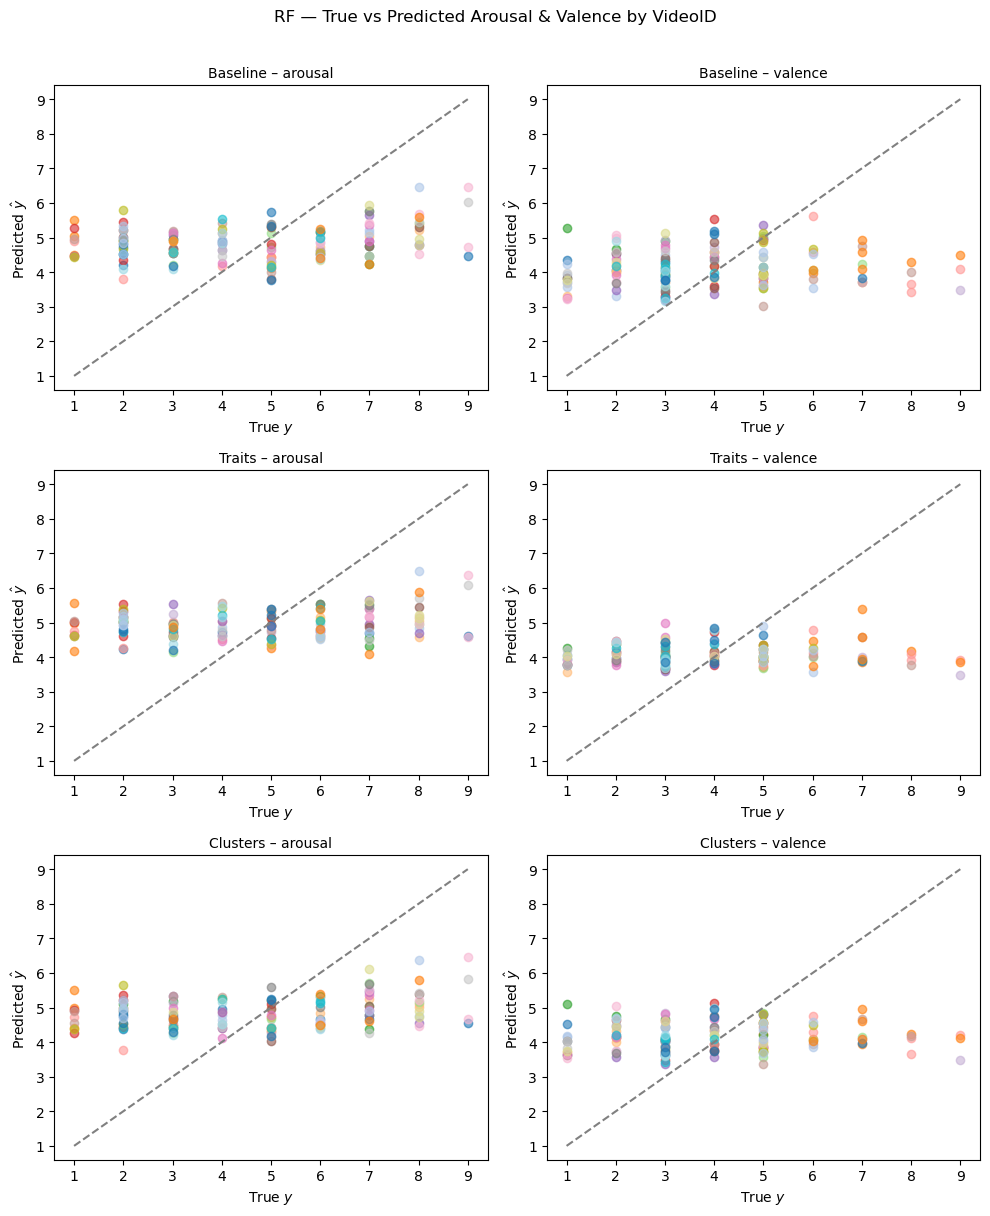

In [18]:
settings = ["no_personality", "traits", "2_pca_clusters"]
measures = ["arousal", "valence"]
algo = "RF"
color_by = "VideoID"

# Define label mapping
label_mapping = {
    "no_personality": "Baseline",
    "traits": "Traits", 
    "2_pca_clusters": "Clusters",
    "arousal": "Arousal",
    "valence": "Valence"
}

cmap = plt.get_cmap("tab20")

# Create subplots: rows = settings, cols = 2 (arousal & valence)
fig, axes = plt.subplots(
    nrows=len(settings),
    ncols=len(measures),
    figsize=(10, 4 * len(settings)),  # wider for side-by-side
    squeeze=False
)

# Loop over settings (rows)
for i, setting in enumerate(settings):
    # Loop over measures (columns)
    for j, measure in enumerate(measures):
        ax = axes[i][j]
        # Get metrics for this combination
        met = results_phy[setting]["regression"][(algo, measure)]["metrics"]
        df = pd.DataFrame({
            "y_true":  met["y_true"],
            "y_pred":  met["y_pred"],
            "group":   met["groups"],
            "VideoID": met["y_video"]
        })
        keys = df[color_by].unique()
        for idx, key in enumerate(keys):
            sub = df[df[color_by] == key]
            ax.scatter(
                sub.y_true, sub.y_pred,
                color=cmap(idx % cmap.N),
                alpha=0.6,
                label=str(key)
            )
        lo, hi = df.y_true.min(), df.y_true.max()
        ax.plot([lo, hi], [lo, hi], "--", c="gray")
        ax.set_xlabel("True $y$")
        ax.set_ylabel("Predicted $\hat y$")
        # Use the mapped label instead of the original setting name
        ax.set_title(f"{label_mapping[setting]} – {measure}", fontsize=10)
        # if i == len(settings) - 1 and j == len(measures) - 1:
        #     ax.legend(
        #         bbox_to_anchor=(1.05, 1),
        #         loc="upper left",
        #         title=color_by,
        #         fontsize="small",
        #         frameon=False
        #     )

# Final title and layout
fig.suptitle(f"{algo} — True vs Predicted Arousal & Valence by {color_by}", y=1.01)
plt.tight_layout()
plt.show()

# residuals vs fitted

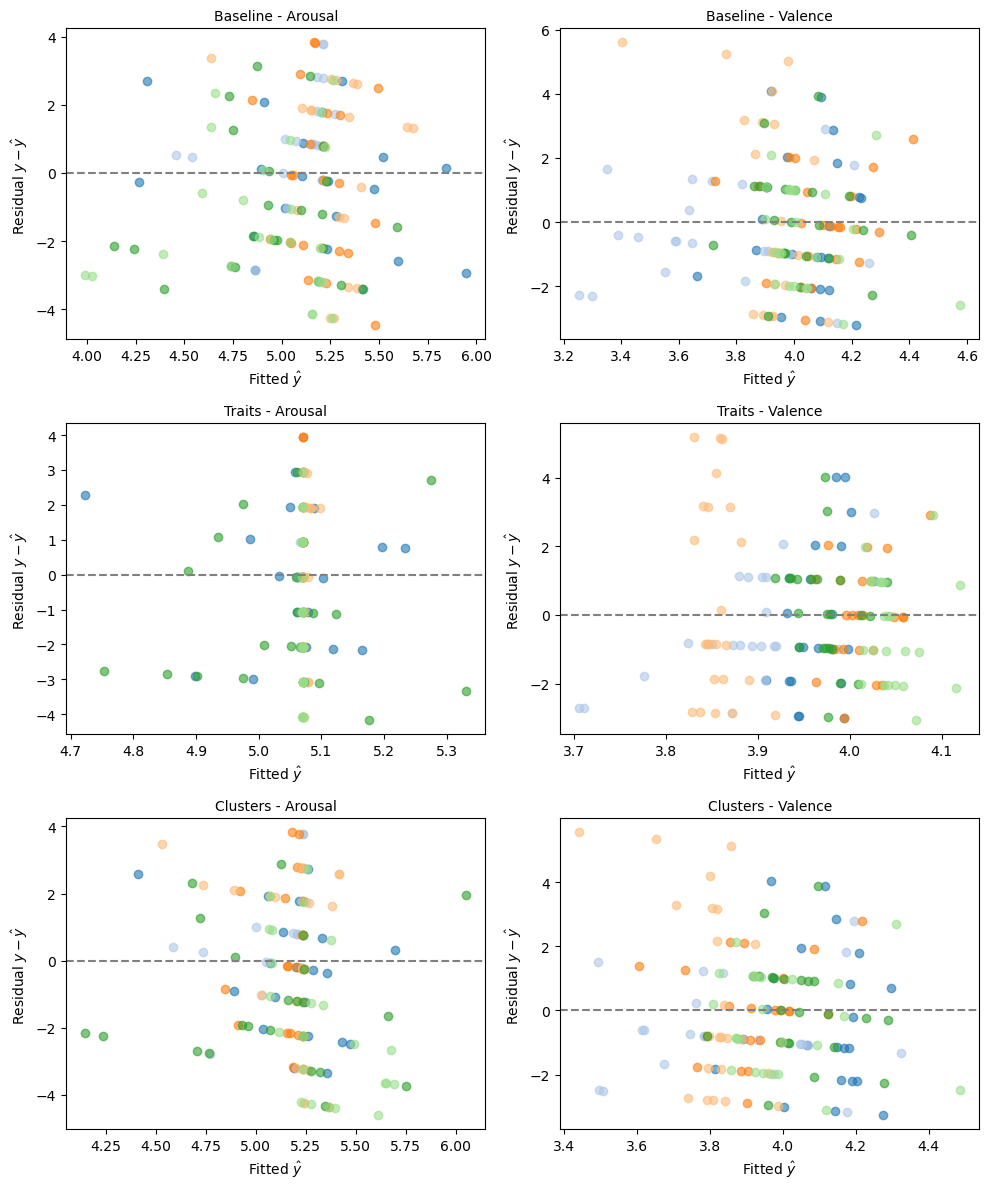

In [19]:
measures = ["arousal", "valence"]
settings = ["no_personality", "traits", "2_pca_clusters"]
algo     = "SVR"

label_mapping = {
    "no_personality": "Baseline",
    "traits": "Traits", 
    "2_pca_clusters": "Clusters",
    "arousal": "Arousal",
    "valence": "Valence"
}


# Create subplots: rows = settings, cols = arousal/valence
fig, axes = plt.subplots(
    nrows=len(settings),
    ncols=len(measures),
    figsize=(5 * len(measures), 4 * len(settings)),
    squeeze=False
)

for i, setting in enumerate(settings):
    for j, measure in enumerate(measures):
        ax = axes[i][j]
        
        met = results_phy[setting]["regression"][(algo, measure)]["metrics"]
        
        df_pred = pd.DataFrame({
            "y_pred": met["y_pred"],
            "resid":  np.array(met["y_true"]) - np.array(met["y_pred"]),
            "group":  met["groups"]
        })

        cmap = plt.get_cmap("tab20")
        groups = df_pred["group"].unique()

        for idx, grp in enumerate(groups):
            sub = df_pred[df_pred["group"] == grp]
            ax.scatter(
                sub["y_pred"],
                sub["resid"],
                color=cmap(idx % cmap.N),
                alpha=0.6,
                label=str(grp)
            )

        ax.axhline(0, linestyle="--", color="gray")
        ax.set_xlabel("Fitted $\hat y$")
        ax.set_ylabel("Residual $y - \hat y$")

        # Combined subplot title: e.g., "Baseline - Arousal"
        ax.set_title(f"{label_mapping[setting]} - {label_mapping[measure]}", fontsize=10)

        # Legend
        # if j == len(measures) - 1:
        #     ax.legend(
        #         bbox_to_anchor=(1.05, 1),
        #         loc="upper left",
        #         title="Group ID",
        #         fontsize="small",
        #         frameon=False
        #     )


# fig.suptitle("PhyMER — Residuals vs Fitted", y=1.02)
plt.tight_layout()
plt.show()


## QQ plots

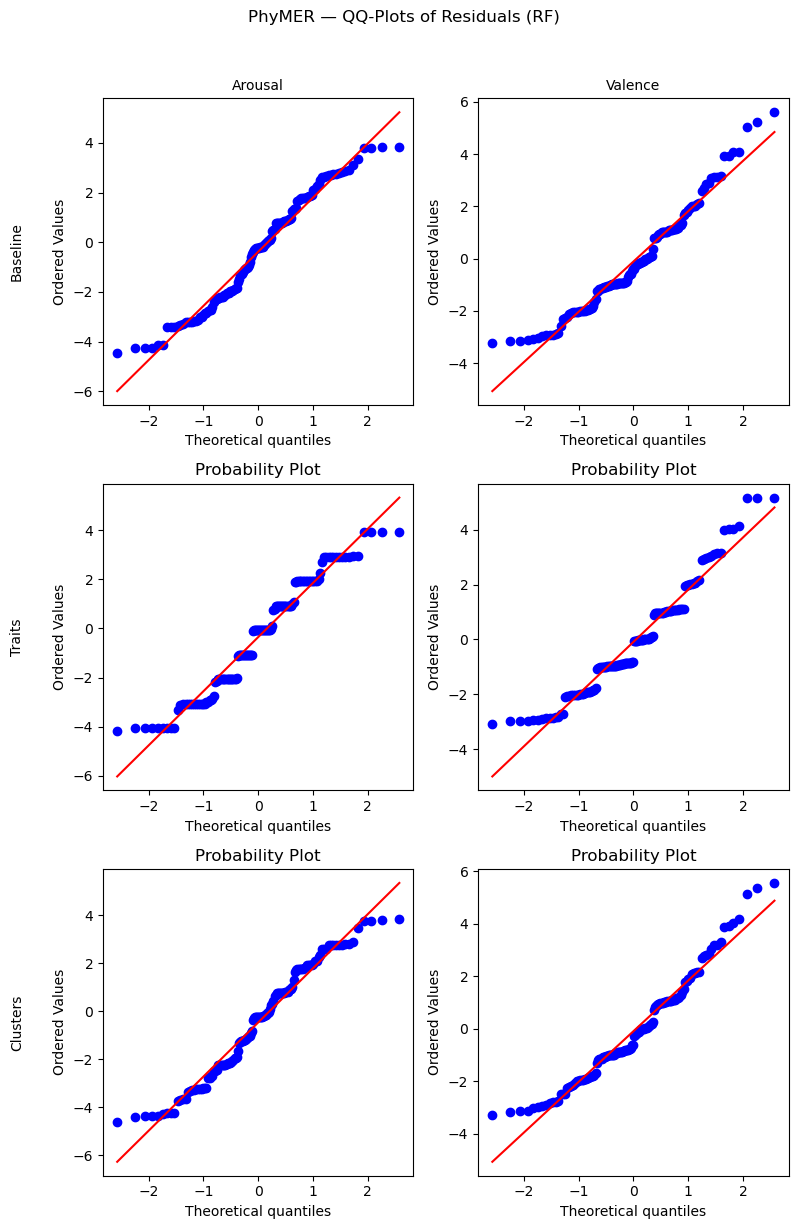

In [20]:
from scipy import stats

measures = ["arousal", "valence"]
settings = ["no_personality", "traits", "2_pca_clusters"]
algo     = "SVR"

label_mapping = {
    "no_personality": "Baseline",
    "traits": "Traits", 
    "2_pca_clusters": "Clusters",
    "arousal": "Arousal",
    "valence": "Valence"
}

fig, axes = plt.subplots(
    nrows=len(settings),
    ncols=len(measures),
    figsize=(4 * len(measures), 4 * len(settings)),
    squeeze=False
)

for i, setting in enumerate(settings):
    for j, measure in enumerate(measures):
        ax = axes[i][j]
        met = results_phy[setting]["regression"][(algo, measure)]["metrics"]
        resid = np.array(met["y_true"]) - np.array(met["y_pred"])

        stats.probplot(resid, dist="norm", plot=ax)

        if i == 0:
            ax.set_title(label_mapping[measure], fontsize=10)
        if j == 0:
            ax.annotate(
            label_mapping[setting],
            xy=(-0.3, 0.5),
            xycoords="axes fraction",
            rotation=90,
            va="center"
        )

fig.suptitle("PhyMER — QQ‐Plots of Residuals (RF)", y=1.02)
plt.tight_layout()
plt.show()


## Feature correlations

In [ ]:
from models import process_labels_phy
import pandas as pd

combined_features = pd.read_csv("/Users/anna/Downloads/Scriptie_code/Code/notebooks/PHY_features.csv")
labels_z = process_labels_phy("/Users/anna/Downloads/Scriptie_code/PhyMER/PhyMER Dataset/labels.csv")

pers_df = pd.read_pickle("/Users/anna/Downloads/Scriptie_code/Code/notebooks/personality_phymer.pkl")


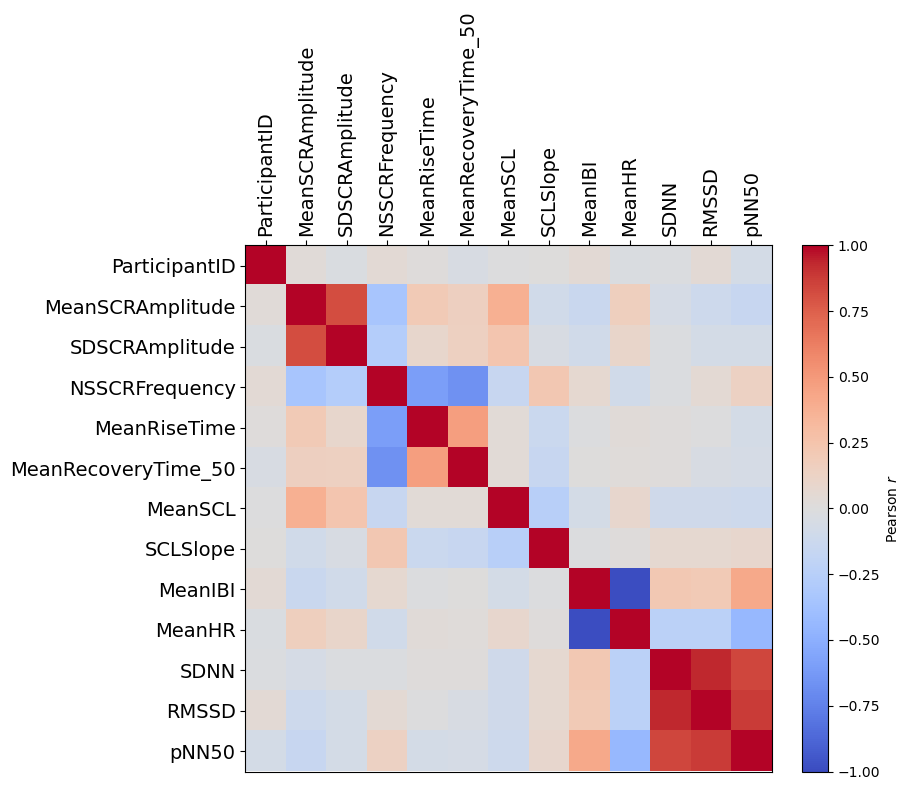

In [22]:
drop_cols = ["VideoID"]
feat_phy = combined_features.select_dtypes(include=np.number).drop(columns=drop_cols, errors="ignore")

# Compute correlation
corr_phy = feat_phy.corr()

# Assuming corr_phy already exists
plt.figure(figsize=(10, 8))
im = plt.imshow(corr_phy, vmin=-1, vmax=1, cmap="coolwarm")

# Title and ticks
ticks = np.arange(len(corr_phy.columns))
plt.xticks(ticks, corr_phy.columns, rotation=90, fontsize=14)
plt.yticks(ticks, corr_phy.columns, fontsize=14)

# Move x-axis ticks to top
plt.gca().xaxis.set_ticks_position('top')
plt.gca().xaxis.set_label_position('top')

plt.grid(False)
plt.colorbar(im, fraction=0.046, pad=0.04, label="Pearson $r$")
plt.tight_layout()
plt.show()




In [23]:
# Ensure consistent dtypes for merge keys
combined_features["ParticipantID"] = combined_features["ParticipantID"].astype(str)
combined_features["VideoID"] = combined_features["VideoID"].astype(str)

labels_z["ParticipantID"] = labels_z["ParticipantID"].astype(str)
labels_z["VideoID"] = labels_z["VideoID"].astype(str)

# Now safely merge
combined_labeled = combined_features.merge(
    labels_z[["ParticipantID", "VideoID", "arousal", "valence"]],
    on=["ParticipantID", "VideoID"],
    how="inner"
)

In [24]:
combined_labeled["ParticipantID"] = combined_labeled["ParticipantID"].astype(str)
pers_df["ParticipantID"] = pers_df["ParticipantID"].astype(str)

feat_df = combined_labeled.merge(
    pers_df[["ParticipantID", "Cluster_PC1", "Cluster_PC2"]],
    on="ParticipantID",
    how="inner"
)

In [25]:
display(feat_df)

,ParticipantID,VideoID,MeanSCRAmplitude,SDSCRAmplitude,NSSCRFrequency,MeanRiseTime,MeanRecoveryTime_50,MeanSCL,SCLSlope,MeanIBI,MeanHR,SDNN,RMSSD,pNN50,arousal,valence,Cluster_PC1,Cluster_PC2
0,1,1,0.062420,0.044335,10.954357,1.863636,1.625000,1.372424,-0.000361,0.810146,74.060766,101.584908,147.520927,57.534247,6,4,-0.837315,0.072387
1,1,2,0.030692,0.015230,18.960499,1.368421,1.023810,1.264481,0.000068,0.780637,76.860283,157.181458,206.380479,75.816993,4,8,-0.837315,0.072387
2,1,3,0.036732,0.018636,16.465696,1.454545,1.166667,1.015059,-0.000431,0.877281,68.393136,121.763302,156.926385,67.883212,6,3,-0.837315,0.072387
3,1,4,0.056859,0.046772,11.566265,1.437500,0.975000,0.926813,-0.000513,0.865668,69.310604,78.789416,117.542742,68.055556,4,5,-0.837315,0.072387
4,1,5,0.036569,0.025894,12.649098,1.552632,1.035714,0.694676,0.001345,0.825461,72.686671,105.282067,151.209946,59.447005,6,3,-0.837315,0.072387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
671,30,20,0.002984,0.001857,12.140078,2.076923,1.194444,-0.512426,-0.000225,0.941636,63.718887,32.910374,45.494280,23.529412,3,3,1.230035,-1.304334
672,30,21,0.003288,0.002608,12.972973,1.711538,0.881579,-0.550134,-0.000127,0.894706,67.061123,38.699161,44.648731,19.402985,2,3,1.230035,-1.304334
673,30,23,0.002530,0.002358,10.977131,1.806818,1.166667,-0.571020,-0.000136,0.949901,63.164491,39.642812,41.363480,14.285714,6,2,1.230035,-1.304334
674,30,24,0.002670,0.001923,14.968815,1.691667,1.054348,-0.616000,-0.000102,0.952505,62.991798,34.708653,52.029138,28.571429,2,4,1.230035,-1.304334


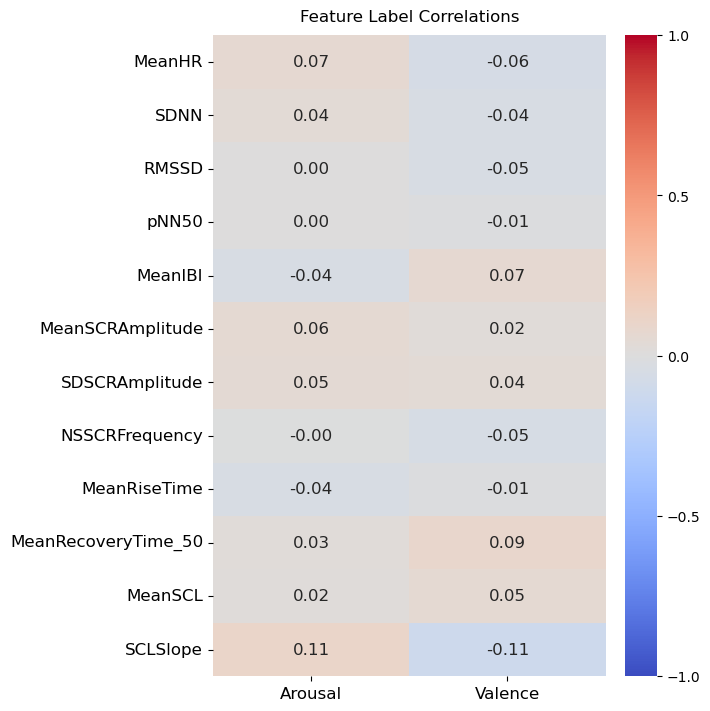

In [26]:
import seaborn as sns

# Select only numeric columns
num_df = feat_df.select_dtypes(include=np.number)

# Extract feature columns (excluding targets)
feature_cols = num_df.columns.difference(["arousal", "valence", "VideoID", "ParticipantID", "Cluster_PC1", "Cluster_PC2"])

# Compute correlations
correlations = {
    "Arousal": num_df[feature_cols].corrwith(num_df["arousal"]),
    "Valence": num_df[feature_cols].corrwith(num_df["valence"]),
}
corr_df = pd.DataFrame(correlations)

# ----- Sort features -----
ecg_feats = ['MeanHR', 'SDNN', 'RMSSD', 'pNN50', 'MeanIBI']
gsr_feats = ['MeanSCRAmplitude', 'SDSCRAmplitude', 'NSSCRFrequency', 'MeanRiseTime', 'MeanRecoveryTime_50', 'MeanSCL', 'SCLSlope']
extra_feats = [c for c in feature_cols if c not in ecg_feats + gsr_feats]
ordered_feats = ecg_feats + gsr_feats + extra_feats

# Reorder rows
corr_df_ordered = corr_df.loc[ordered_feats]


fig, ax = plt.subplots(figsize=(7, 7), constrained_layout=True)

sns.heatmap(
    corr_df_ordered,
    annot=True,
    center=0,
    cmap="coolwarm",
    fmt=".2f",
    vmin=-1,
    vmax=1,
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]},
    annot_kws={"size": 12},
    ax=ax
)

ax.set_title("Feature Label Correlations", pad=10, fontsize=12)
ax.tick_params(labelsize=12)

plt.show()




In [27]:
# load personality data
pers_df = pd.read_pickle("/Users/anna/Downloads/Scriptie_code/Code/notebooks/personality_phymer.pkl")

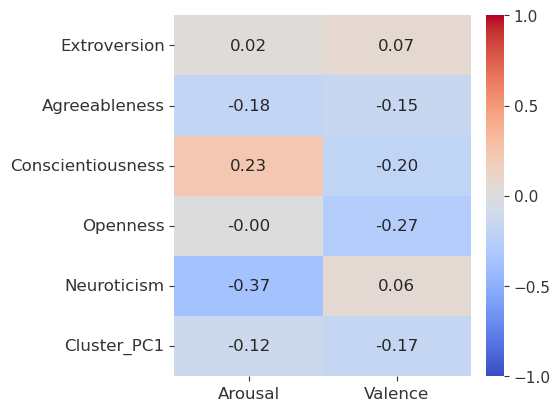

In [40]:
# Ensure participant IDs match in type
labels_z["ParticipantID"] = labels_z["ParticipantID"].astype(int)

# Step 1: Average arousal and valence per participant
labels_avg = labels_z.groupby("ParticipantID")[["arousal", "valence"]].mean().reset_index()

# Step 2: Merge with personality data
pers_merged = pers_df.merge(labels_avg, on="ParticipantID", how="inner")

# Step 3: Compute correlation matrix
cor_matrix = pers_merged.corr(numeric_only=True)

# Step 4: Select and reorder specific traits
trait_order = [
    "Extroversion",
    "Agreeableness",
    "Conscientiousness",
    "Openness",
    "Neuroticism",
    "Cluster_PC1",
]
correlations = cor_matrix.loc[trait_order, ["arousal", "valence"]].round(2)
correlations = correlations.rename(columns={"arousal": "Arousal", "valence": "Valence"})


fig, ax = plt.subplots(figsize=(5.5, 4), constrained_layout=True)

sns.heatmap(
    correlations,  # your DataFrame
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    ax=ax,
    cbar_kws={"ticks": [-1, -0.5, 0, 0.5, 1]},
    annot_kws={"size": 12}
)
ax.tick_params(labelsize=12)

plt.show()



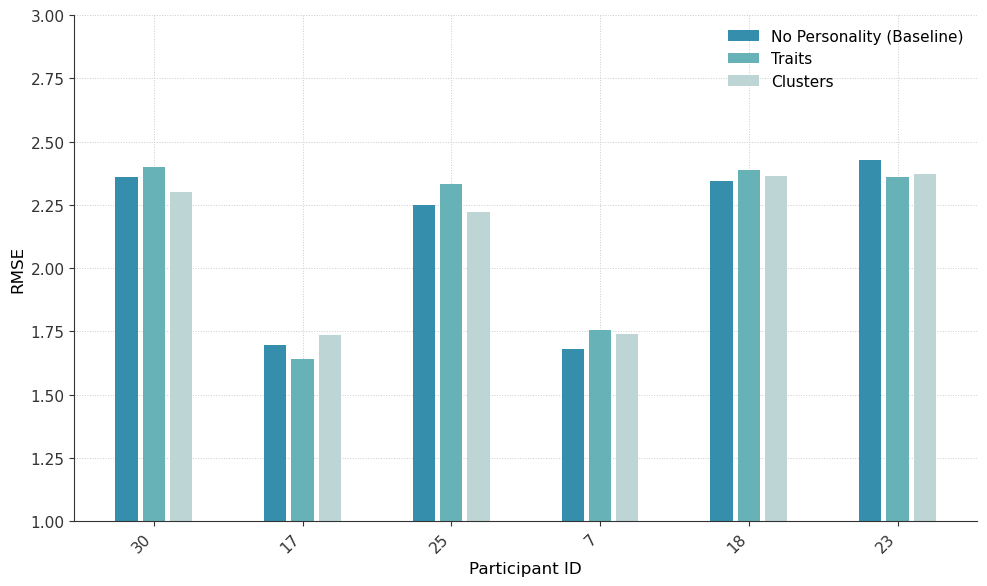

In [29]:
# Plot style
plt.rcParams.update({
    "axes.edgecolor": "#333333",
    "axes.linewidth": 0.8,
    "grid.color": "#cccccc",
    "grid.linestyle": ":",
    "grid.linewidth": 0.7,
    "axes.grid": True,
    "xtick.color": "#333333",
    "ytick.color": "#333333",
    "font.size": 11,
    "axes.titlesize": 13,
    "axes.labelsize": 12
})

legend_labels = {
    "no_personality": "No Personality (Baseline)",
    "traits": "Traits",
    "2_pca_clusters": "Clusters"
}


task = "arousal"
algo = "RF"
variants = ["no_personality", "traits", "2_pca_clusters"]
colors = {
    "no_personality": "#358EAC",     # teal
    "traits":         "#66B2B7",     # dark cyan
    "2_pca_clusters": "#BED5D6",     # light cyan
}

def get_rmse_per_participant(setting):
    met = results_phy[setting]["regression"][(algo, task)]["metrics"]
    df_preds = pd.DataFrame({
        "y_true":  met["y_true"],
        "y_pred":  met["y_pred"],
        "group":   met["groups"].astype(str)
    })
    df_preds["squared_error"] = (df_preds["y_true"] - df_preds["y_pred"])**2
    return df_preds.groupby("group")["squared_error"].mean().apply(np.sqrt)

# Collect RMSEs
rmse_by_setting = {name: get_rmse_per_participant(name) for name in variants}

# Sort participants based on one setting
common_participants = list(
    set.intersection(*[set(rmse.index) for rmse in rmse_by_setting.values()])
)
sorted_participants = list(common_participants)  # <- no sorting
x = np.arange(len(sorted_participants)) * 1.2

# Bar settings
bar_width = 0.18
gap = 0.04        # spacing between bars
offsets = [-bar_width - gap, 0, bar_width + gap]

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
for i, setting in enumerate(variants):
    rmse_vals = rmse_by_setting[setting][sorted_participants]
    ax.bar(x + offsets[i], rmse_vals.values,
       width=bar_width,
       label=legend_labels[setting],
       color=colors[setting])

# Formatting
ax.set_xticks(x)
ax.set_xticklabels(sorted_participants, rotation=45, ha="right")
ax.set_ylabel("RMSE")
ax.set_xlabel("Participant ID")
# ax.set_title(f"SVR — RMSE per Participant ({task.title()})")
ax.set_ylim(1, 3)
ax.legend(frameon=False)

# Style
ax.yaxis.grid(True)
ax.set_axisbelow(True)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [30]:
from itertools import combinations
import numpy as np

def average_pairwise_rmse_diff(rmse_series):
    diffs = [
        abs(a - b)
        for a, b in combinations(rmse_series.values, 2)
    ]
    return np.mean(diffs)

# Compute and print for each variant
for setting in variants:
    rmse = rmse_by_setting[setting][sorted_participants]
    avg_diff = average_pairwise_rmse_diff(rmse)
    print(f"Avg pairwise RMSE difference ({legend_labels[setting]}): {avg_diff:.3f}")


Avg pairwise RMSE difference (No Personality (Baseline)): 0.388
Avg pairwise RMSE difference (Traits): 0.382
Avg pairwise RMSE difference (Clusters): 0.342


/var/folders/ry/fx9j7t7j6sg5lzcmsnqr0pk00000gn/T/ipykernel_16932/2425341235.py:9: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_arousal.groupby("VideoID")
/var/folders/ry/fx9j7t7j6sg5lzcmsnqr0pk00000gn/T/ipykernel_16932/2425341235.py:22: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_valence.groupby("VideoID")


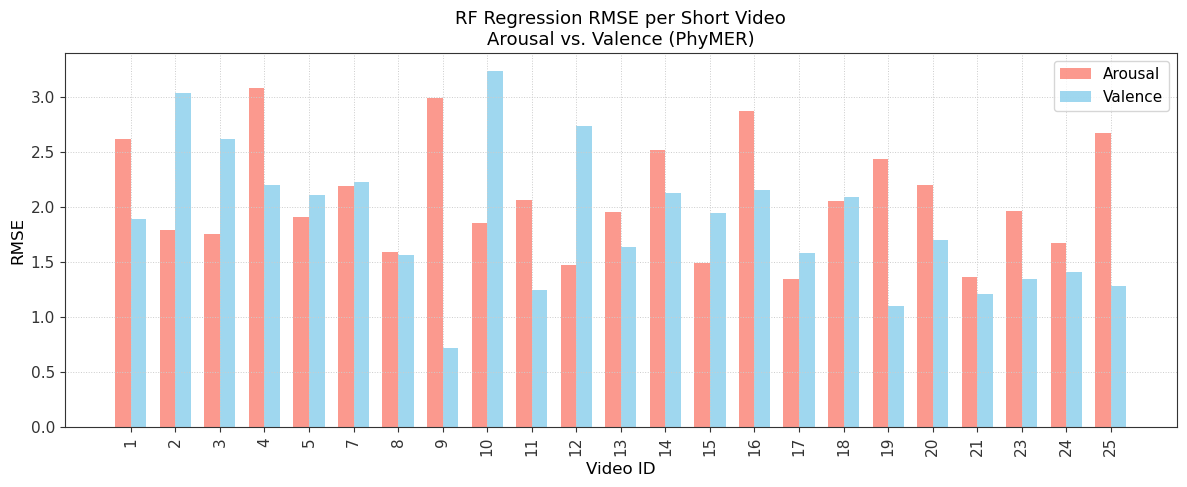

In [31]:
# arousal
met_arousal = results_phy[setting]["regression"][("RF", "arousal")]["metrics"]
df_arousal = pd.DataFrame({
    "y_true":  met_arousal["y_true"],
    "y_pred":  met_arousal["y_pred"],
    "VideoID": pd.to_numeric(met_arousal["y_video"], errors="coerce")
})
rmse_arousal = (
    df_arousal.groupby("VideoID")
    .apply(lambda x: np.sqrt(((x.y_true - x.y_pred) ** 2).mean()))
    .rename("Arousal_RMSE")
)

# valence
met_valence = results_phy[setting]["regression"][("RF", "valence")]["metrics"]
df_valence = pd.DataFrame({
    "y_true":  met_valence["y_true"],
    "y_pred":  met_valence["y_pred"],
    "VideoID": pd.to_numeric(met_valence["y_video"], errors="coerce")
})
rmse_valence = (
    df_valence.groupby("VideoID")
    .apply(lambda x: np.sqrt(((x.y_true - x.y_pred) ** 2).mean()))
    .rename("Valence_RMSE")
)

# combine in one plot
rmse_both = pd.concat([rmse_arousal, rmse_valence], axis=1).sort_index()

# plot
fig, ax = plt.subplots(figsize=(12, 5))
indices = np.arange(len(rmse_both))
width = 0.35

ax.bar(indices - width/2, rmse_both["Arousal_RMSE"], width, label="Arousal", color="salmon", alpha=0.8)
ax.bar(indices + width/2, rmse_both["Valence_RMSE"], width, label="Valence", color="skyblue", alpha=0.8)

# labels
ax.set_xticks(indices)
ax.set_xticklabels(rmse_both.index.astype(int), rotation=90)
ax.set_ylabel("RMSE")
ax.set_xlabel("Video ID")
ax.set_title("RF Regression RMSE per Short Video\nArousal vs. Valence (PhyMER)")
ax.legend()

plt.tight_layout()
plt.show()


# how are biological signals (features) related to the videos?
- do biological responses differ across videos?

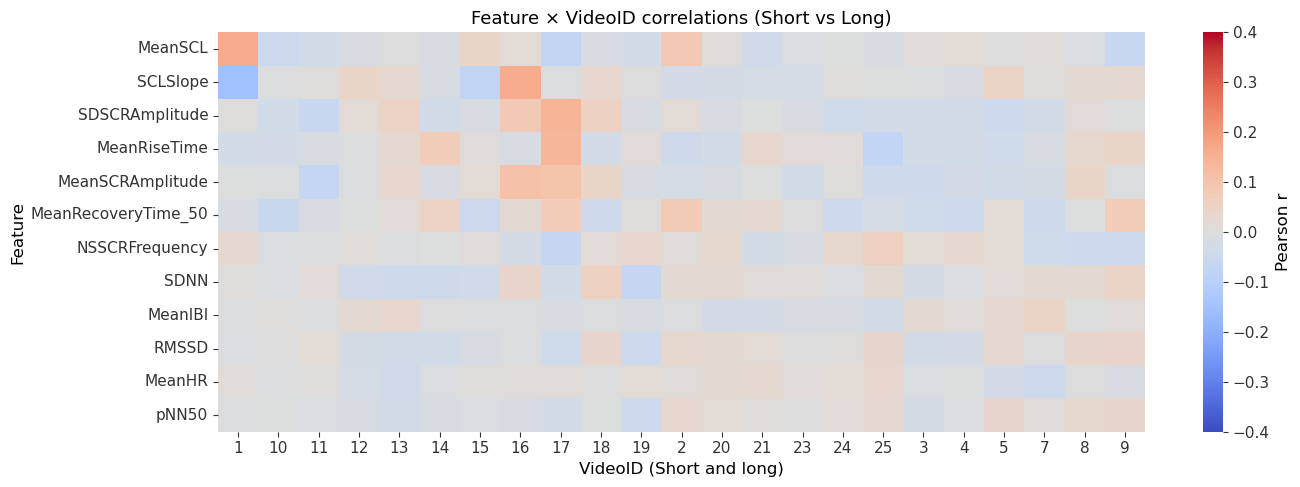

In [32]:
def feature_video_corr(df):
    id_cols = {"ParticipantID","VideoID",
               "Arousal_z","Valence_z","Cluster_PC2"}
    features = [c for c in df.columns if c not in id_cols] # exclude these columns
    videos = sorted(df["VideoID"].unique(), key=str) # make sure videos appear in order
    # init empty df
    corr = pd.DataFrame(index=features, columns=videos, dtype=float)
    for v in videos: # for each video, compute its dummy correlation with each feature
        y = (df["VideoID"] == v).astype(int) # y is een 0/1 vector
        
        # loop over iedere feature kolom
        for feat in features:
            x = pd.to_numeric(df[feat], errors="coerce") 
            mask = x.notna() & y.notna() # drop NaNs

            if mask.sum() < 3 or y[mask].nunique() == 1 or x[mask].var()==0: # als er te weinig samples zijn -> geen correlatie mogelijk
                corr.at[feat, v] = np.nan                         
            else:
                corr.at[feat, v] = np.corrcoef(x[mask], y[mask])[0,1] # compute r

    # order by the largest absolute r
    feat_order = corr.abs().max(axis=1).fillna(0).sort_values(ascending=False).index # max r per feature across all videos
    return corr.loc[feat_order]


# make two seperate matrices, one long & short
corr_short = feature_video_corr(combined_features)
# uplot
plt.figure(figsize=(14, len(corr_short)*0.25 + 2))
sns.heatmap(
    corr_short,
    cmap="coolwarm",
    center=0,
    cbar_kws={"label":"Pearson r"},
    xticklabels=True,
    yticklabels=True,
    vmin=-0.4,     # Set minimum of color range
    vmax=0.4       # Set maximum of color range
)
plt.xlabel("VideoID (Short and long)")
plt.ylabel("Feature")
plt.title("Feature × VideoID correlations (Short vs Long)")
plt.tight_layout()
plt.show()


# feature variance
how much features fluctuate across persons.
Intraclass Correlation Coefficient (ICC) is a statistical measure that quantifies the degree of similarity or consistency among observations that are made on the same individuals or objects.
0–0.2 → most variance is trial noise; people look similar
0.6–1.0 → participant identity dominates that feature

In [33]:
# from sklearn.preprocessing import StandardScaler

id_cols   = ["ParticipantID", "VideoID"]        # never scale these
features  = [c for c in combined_features.columns if c not in id_cols]

# scaler = StandardScaler().fit(combined_features[features])  # fit once
# df_z   = combined_features.copy()
# df_z[features] = scaler.transform(combined_features[features])


In [34]:
# # one row = average feature values for each participant
# means_by_p  = df_z.groupby("VideoID")[features].mean()

# # variance of those means       →  between-person component
# var_between = means_by_p.var(ddof=0)

# # variance of each feature *within* every participant
# var_within_person = (df_z
#                      .groupby("VideoID")[features]
#                      .var(ddof=0))

# # average within-person variance across participants
# var_within = var_within_person.mean()

# # Intraclass-Correlation Coefficient for each feature
# ICC = var_between / (var_between + var_within)


In [35]:
# import matplotlib.pyplot as plt

# ICC.sort_values(ascending=False).plot(kind="barh", figsize=(8,6), color = plt.get_cmap('tab20')(11),)
# plt.xlabel("ICC  (0 = low between-person, 1 = high)")
# plt.title("Between-person dominance per feature (PhyMER)")
# plt.grid(True, linestyle=':')
# plt.tight_layout()
# plt.show()


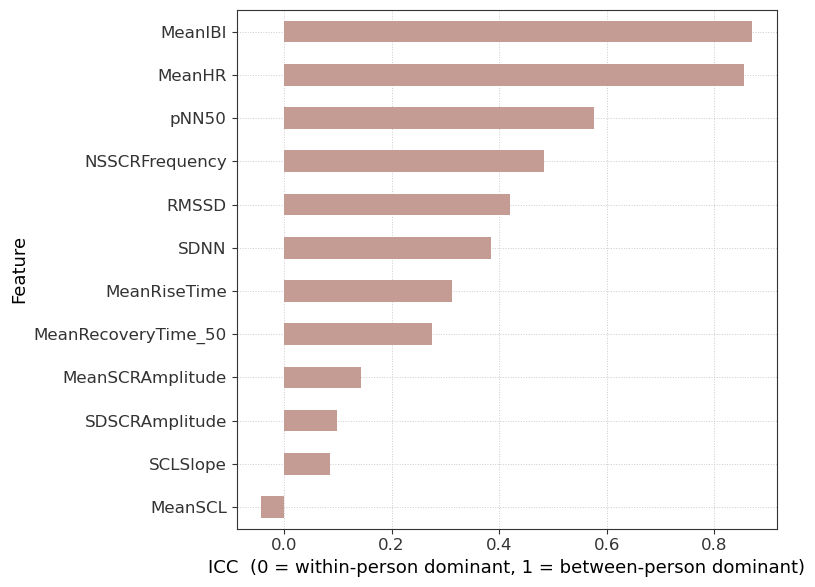

In [36]:
# Compute number of observations per subject
n_per_subj = combined_features.groupby('ParticipantID').size()
n_bar = n_per_subj.mean()

# Compute ICC for each feature
icc_vals = {}
for feat in features:
    grand = combined_features[feat].mean()
    subj_means = combined_features.groupby('ParticipantID')[feat].mean()
    
    ss_between = ((subj_means - grand)**2 * n_per_subj).sum()
    df_between = n_per_subj.count() - 1
    ms_between = ss_between / df_between
    
    ss_within = ((combined_features[feat] - combined_features.groupby('ParticipantID')[feat].transform('mean'))**2).sum()
    df_within = len(combined_features) - n_per_subj.count()
    ms_within = ss_within / df_within
    
    icc_vals[feat] = (ms_between - ms_within) / (ms_between + (n_bar - 1) * ms_within)

# Convert to DataFrame
icc_df = pd.Series(icc_vals, name='ICC').to_frame()

# Sort and plot
ax = icc_df['ICC'].sort_values(ascending=True).plot(
    kind='barh',
    figsize=(8, 6),
    color=plt.get_cmap('tab20')(11)
)

# Add grid and style adjustments
ax.grid(True, axis='x', linestyle=':', linewidth=0.7)
ax.set_axisbelow(True)  # ensure grid is behind bars

# Label styling
ax.set_xlabel("ICC  (0 = within-person dominant, 1 = between-person dominant)", fontsize=13)
ax.set_ylabel("Feature", fontsize=13)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Optional title
# plt.title("Between-person dominance per feature (PhyMER) – weighted ICC", fontsize=14)

plt.tight_layout()
plt.show()


In [37]:
hi = icc_df.sort_values(by="ICC", ascending=True)
display(hi)

,ICC
MeanSCL,-0.042348
SCLSlope,0.084815
SDSCRAmplitude,0.098501
MeanSCRAmplitude,0.142973
MeanRecoveryTime_50,0.274535
MeanRiseTime,0.312204
SDNN,0.385402
RMSSD,0.420109
NSSCRFrequency,0.483098
pNN50,0.577037


In [38]:
# extract best parameters
# Extract best_params from regression results
rows = []
for personality, content in results_phy.items():
    reg_results = content["metrics"]["regression"]
    for (model, dataset), result in reg_results.items():
        try:
            best_params = result["metrics"]["best_params"]
            row = {
                "personality": personality,
                "model": model,
                "dataset": dataset,
                **best_params  # unpack the parameters into columns
            }
            rows.append(row)
        except KeyError:
            print(f"Skipping {personality}-{model}-{dataset}: no best_params.")

df_best_params = pd.DataFrame(rows)

int_cols = [
    "rf__n_estimators",
    "rf__max_depth",
    "rf__min_samples_split",
    "rf__min_samples_leaf",
    "svr__degree",
]
# keep only the ones present
int_cols = [c for c in int_cols if c in df_best_params.columns]
# # cast to pandas nullable Int64, which maps NaN→<NA>
for c in int_cols:
    df_best_params[c] = df_best_params[c].astype("Int64")

df_best_params.to_csv("best_params_regression.csv", index=False)
display(df_best_params)


KeyError: 'metrics'

In [ ]:
rows = []
for setting, met in results_phy.items():
    reg = met["regression"]  # direct access, no ["results"]
    for (algo, task), info in reg.items():
        m = info["metrics"]  # this is your metrics dict
        rows.append({
            "setting"   : setting,
            "algorithm" : algo,
            "task"      : task,
            "params"    : m["best_params"],

        })

metrics_df = (
    pd.DataFrame(rows)
      .set_index(["setting", "algorithm", "task"])
      .sort_index()
)


In [ ]:
metrics_df.to_csv('metrics.csv')